# Credit Card Fraud Detection

Author: Shannon Snively

This notebook will walk through techniques of working with unbalanced data, and the different classification models that we can use to detect if a transaction was fraud or not. This data was post of the kaggle website with the pre-processing step of the data already complete. So the objective is really to explore the features we have, and try to determine if we can gain some meaning from the features to be able to predict fraudulant charges. We are coming into a world where the ability to detect fraud and as well as any other security breach, especially prior to them happening is crucial. This is a good dataset to get a general idea of where to start, and techniques to carry forward throughout your designated career.

# Data Dictionary

The dataset contains transactions made by credit cards in the month of September 2013 by european cardholders. All of the observations occur in a two day span, where we there were 492 frauds out of 284,807 transactions. The dataset was collected and analysed by the Machine Learning Group of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. The data only contains numerical variables which are the result of a PCA transformation. The PCA transformation was for security and confidentiality reasons.

* Features V1, V2, ... V28 are the principal components obtained with PCA
* 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
* 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
* 'Class' is the response variable and it takes value **1 in case of fraud and 0 otherwise.**

Given the class imbalance ratio, the recommended scoring measure for accuracy is the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

**Unbalanced Data:** When you encounter such problems, you’re bound to have difficulties solving them with standard algorithms. Regular algorithms are often biased towards the majority class because of their loss functions attempt to optimize error rate, without taking the data distribution into consideration. In the worst case, minority examples are treated as outliers of the majority class and ignored. So let us begin our journey into the world of fraud.

**Contents:**
* [Data Exploration](#0)
    * [Response Feature](#0.1)
    * [Other Features](#0.2)
* [Imbalanced Data](#1)
    * [Logistic Regression with Imbalanced Data](#1.1)
        * [Undersampling Techniques](#1.1.1)
        * [Oversampling Techniques](#1.1.2)
* [Random Forest Classifier](#2)
* [Support Vector Classifier](#3)
* [Extreme Gradient Boosting Classifier](#4)


<a id='0'></a>
# Data Exploration
In this first section of the notebook I will go through and explore some of the features. I will look at their structure in the dataset, look to validate the pre-processing steps, and visualize the data to get a better understanding.

The dataset can be found here and downloaded for interactive use with this notebook:
https://www.kaggle.com/dalpozz/creditcardfraud

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# pandas function to read in a csv file
df = pd.read_csv('creditcard.csv')

In [3]:
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

<a id='0.1'></a>
## Response Feature
After getting an understanding for the structure of the data we can dive into different inquiries about certain features of the data. Like mentioned in the introduction the class has a very imbalanced data set where majority of the observations are non-fraudulant. There are only 492 fraud observations as it is noted below. 

In [5]:
Counter(df['Class'])

Counter({0: 284315, 1: 492})

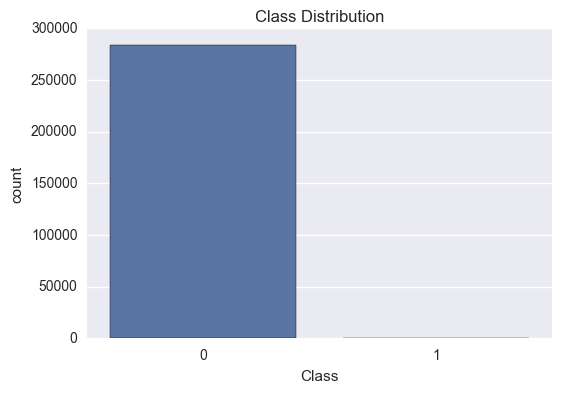

In [6]:
sns.countplot(df['Class']);
plt.title('Class Distribution');

Below is an interactive map that incorporates a box plot for any selected feature with the x-axis represented by Class. This is very useful because you can see how each of the features are represented by the class. You might have a few features that are majority for one class or another.

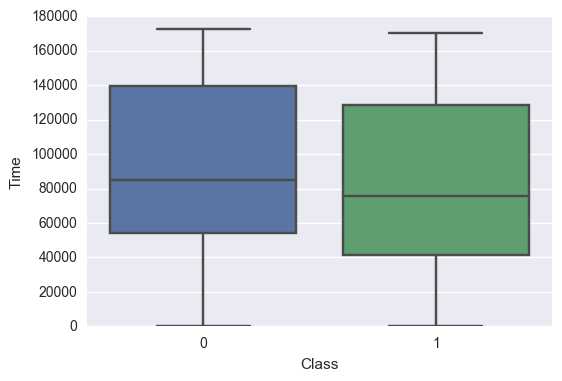

In [7]:
# this is an interactive map that allows you to look at the boxplot between the response and other variables. 
from ipywidgets import interact
%matplotlib inline

column_name = list(df.columns)

@interact
def box_plot(Feature= column_name):
    sns.boxplot(df['Class'], df[Feature])

We also know from the introduction that part of the pre-processing step was already completed, which we can see from zero missing values.

In [8]:
df.isnull().sum() # There is no missing or null values in this dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Okay, so what does this dataset consist of? The describe function allows us to get a few of the descriptive statistics of each of the variables, which may be useful for the pca components since we do not necessarily know what they are. 

In [9]:
# select any index value to get the summary statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


<a id='0.2'></a>
## Other Features in dataset
So we have the PCA components, but we also have some known components which would be interesting to explore further. I wanted to start with the time component, and see if there is any peak of fraud over time or the average amounts of money spent in each class. 

Lets remember that these transactions are covered in a two day span, and Time represents the seconds that have elasped prior to the next transaction. For the Time component that means 60 seconds = 1 minute, 60 minutes = 1 hour, and 24 hours = 1 day so we should have between 0 to 86,400 seconds for a one day span. It might be interesting to look at just the fradulent data, and compare the two different days.

After taking a look at the amount of unique time values we see there are only 124,592 which means that about 50,000 seconds of elapsed time between transactions.

In [10]:
df.shape

(284807, 31)

In [11]:
len(df.Time.unique())

124592

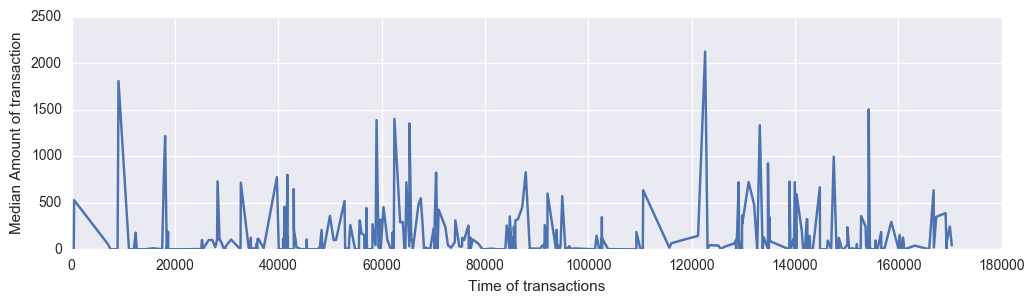

In [12]:
fraud_amount = df[df.Class ==1]
time = fraud_amount.groupby('Time')['Amount'].agg('median')

plt.figure(figsize=(12, 3));
plt.plot(time.index, time.values);
plt.xlabel('Time of transactions');
plt.ylabel('Median Amount of transaction');

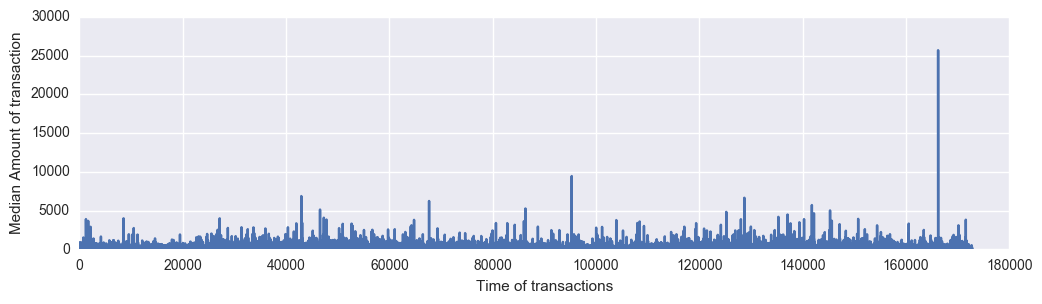

In [13]:
non_fraud_amount = df[df.Class ==0]
time = non_fraud_amount.groupby('Time')['Amount'].agg('median')

plt.figure(figsize=(12, 3));
plt.plot(time.index, time.values);
plt.xlabel('Time of transactions');
plt.ylabel('Median Amount of transaction');

Some of the information is missing such as what time this study actually began. That would be useful because then we could begin to look for patterns over time, and maybe understand the relationship better. The spike of the transaction amount is the only one that is more than 10,000. It might be worth taking a further look at this and determining if it is an outlier or not. We can see the price difference in those that were labeled as fraud verse those that were not.

In [14]:
non_fraud = df[df.Class ==0]
fraud= df[df.Class ==1]

In [15]:
non_fraud_amount = df[df.Class ==0].groupby('Amount')['Amount'].count()
fraud_amount= df[df.Class ==1].groupby('Amount')['Amount'].count()

In [16]:
print('Min Amount for Non-fraud transaction {}'.format(non_fraud_amount.index.min()))
print('Max Amount for Non-fraud transaction {}'.format(non_fraud_amount.index.max()))

Min Amount for Non-fraud transaction 0.0
Max Amount for Non-fraud transaction 25691.16


In [17]:
non_fraud_amount.index[::-1]

Float64Index([25691.16, 19656.53,  18910.0, 12910.93, 11898.09, 11789.84,
              10199.44,  10000.0,  8790.26,   8787.0,
              ...
                  0.09,     0.08,     0.07,     0.06,     0.05,     0.04,
                  0.03,     0.02,     0.01,      0.0],
             dtype='float64', name='Amount', length=32701)

In [18]:
big_values = [x for x in non_fraud_amount.index if x > 10000]
print('More than 10000: ',len(big_values))
big_values = [x for x in non_fraud_amount.index if x > 8000]
print('More than 8000: ',len(big_values))
big_values = [x for x in non_fraud_amount.index if x > 6000]
print('More than 6000: ',len(big_values))
big_values = [x for x in non_fraud_amount.index if x > 5000]
print('More than 5000: ',len(big_values))
big_values = [x for x in non_fraud_amount.index if x > 4000]
print('More than 4000: ',len(big_values))
big_values = [x for x in non_fraud_amount.index if x > 2500]
print('More than 2500: ',len(big_values))

More than 10000:  7
More than 8000:  12
More than 6000:  32
More than 5000:  55
More than 4000:  116
More than 2500:  418


So if we focus on non-fraud transactions for a minute we see that the minimum amount spent was 0 and the most was the highest value 25691.16. We can also see that the average price is gerenally on the lower end between 0 to 50 as noted below. The ten most frequent transactions account for more than 60,000 observations from the non_fraud dataset,which is about a quarter of the data. There are roughly 32,700 unique amount values out of roughly 290,000 observations. 

In [19]:
# Then it might be interesting to see what is the most common
nf_amount = Counter(non_fraud['Amount'])
nf_amount.most_common(10)

[(1.0, 13575),
 (1.98, 6044),
 (0.89000000000000001, 4872),
 (9.9900000000000002, 4746),
 (15.0, 3280),
 (0.76000000000000001, 2981),
 (10.0, 2950),
 (1.29, 2892),
 (1.79, 2622),
 (0.98999999999999999, 2304)]

In [20]:
len(nf_amount)

32701

Now lets look at fraud and see what we can detect. Right out we see that the transaction amount is way less that non_fraud amounts, which tells me that the criminals and theives are safe in the amounts they take. We also have to keep in mind that the amount is the total for that transaction, where each line is a new credit card transaction. That means that we do not know if the same card was hit multiple times and showing up in the data. That could be something that we could detect by the time distance in the fraud dataset.

In [21]:
print('Min Amount for Fraud transaction {}'.format(fraud_amount.index.min()))
print('Max Amount for Fraud transaction {}'.format(fraud_amount.index.max()))

Min Amount for Fraud transaction 0.0
Max Amount for Fraud transaction 2125.87


In [22]:
fraud_amount.index[::-1]

Float64Index([2125.87, 1809.68, 1504.93, 1402.16, 1389.56, 1354.25,  1335.0,
              1218.89, 1096.99,  996.27,
              ...
                 0.92,    0.83,    0.77,    0.76,    0.69,    0.68,    0.38,
                  0.2,    0.01,     0.0],
             dtype='float64', name='Amount', length=259)

In [23]:
amount = Counter(fraud['Amount'])
amount.most_common(10)

[(1.0, 113),
 (0.0, 27),
 (99.989999999999995, 27),
 (0.76000000000000001, 17),
 (0.77000000000000002, 10),
 (0.01, 5),
 (2.0, 4),
 (3.79, 4),
 (1.1000000000000001, 3),
 (12.31, 3)]

In [24]:
len(amount)

259

For fraud transactions it is hard to say what is considered unusual because there is not a lot of observations in the data. Here we see now that the 20 most common amount values are between 0 and 512, where the frequency dropped from a 1000 to 2 being in the 20 most common amounts. That confirms to me that fraud amounts are spuradic or individualized, which I am sure anyone could have guessed.

So we have spent some time looking at Amount and Time, but still do not have really an idea of what the PCA components consist of. Something to give us a better concept of what each entails below is an interactive scatterplot matrix of the class variable and any other specified feature in the data. The plot also gives the distribution for each of the features picked where you can determine if any transformations should be applied.

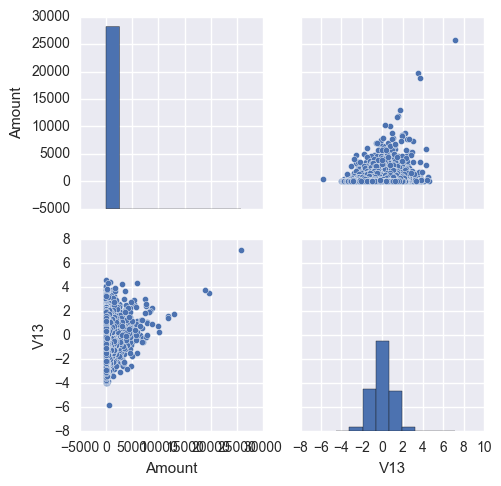

In [25]:
%matplotlib inline

@interact
def sns_scatter(Feature_x=column_name, Feature_y=column_name):
    
    scatter_list = [Feature_x, Feature_y]

    sns.set(color_codes=True)
    sns.pairplot(df[scatter_list])

<a id='1'></a>
# So what to do with imbalanced data?

Well there is a thing called:
* **Accuracy paradox**: which is the case where we get a higher accuracy percentage because it is reflecting the underlying class distribution. The dataset is highly imbalanced, the positive class (frauds) account for 0.172% of all transactions.
    * Conventional algorithms are often biased towards the majority class because their loss functions attempt to optimize quantities such as error rate, not taking the data distribution into consideration. 
    * In some cases, minority examples may even be treated as outliers of the majority class and ignored, or the learning algorithm generates a classifier that classifies every example as the majority class.


So now how do we deal with unbalanced data? 

Well there is a couple of ways from `imblearn` library that covers under_sampling and over_sampling for each class. 

**List of Techniques**
1. **Collect more data**, which for this notebook it will not work.
2. **Use a different scoring method**. Accuracy will be biased towards the majority class, and the F1 or ROC_AUC score will be a better estimator for true positives. 
    A few key terms for classification and accuracy:

    __Accuracy__ = TP+TN/Total

    __Precison__ = TP/(TP+FP)

    __Recall__ = TP/(TP+FN)

    __F1__ = (Precison * Recall) / (Precison + Recall)

    __TP__ = True positive, number of cases that were positive and predicted positive

    __TN__ = True negative, number of cases that were negative and predicted negative

    __FP__ = False possitve, number of cases that were negative and predicted positive 

    __FN__= False Negative, number of cases that were positive and predicted negative 

    The ones that were predicted right are always a good thing, but those that predicted wrong is not. It is always a trade off for which one will affect you more FP or FN, it comes down to the scope of the project or business goal.

    Using accuracy yeilds a much higher result compared to the average_precision score (area under the precision-recall curve).This is because if one of the classes has a large sample size they are going to have more weight for the numerator, which when divided by the denominator will yeild a high accuracy. Once you get to the classification report, look at the support column and you can verify the amount of imbalanced data in your sample. 

    The f1 score is also a valid measure of an accurate model. This is the harmonic mean of precision and recall, and will be more insensitive to imbalanced data.

3. **Resample the dataset** so that the sample you use to build the model is more balanced. 

    **imblearn.under_sampling** deletes instances from the over-represented class. 
    * Random majority under-sampling with replacement
    * Extraction of majority-minority Tomek links
    * Under-sampling with Cluster Centroids
    * NearMiss-(1 & 2 & 3) 
    * Condensend Nearest Neighbour 
    * One-Sided Selection 
    * Neighboorhood Cleaning Rule 
    * Edited Nearest Neighbours 
    * Instance Hardness Threshold
    * Repeated Edited Nearest Neighbours 
    * AllKNN 
        
  **imblearn.over_sampling** adds copies of instances from the under-represented class (sampling with replacement).
    
    * Random minority over-sampling with replacement
    * SMOTE - Synthetic Minority Over-sampling Technique 
    * bSMOTE(1 & 2) - Borderline SMOTE of types 1 and 2
    * SVM SMOTE - Support Vectors SMOTE 
    * ADASYN - Adaptive synthetic sampling approach for imbalanced learning 
  
  **Over-sampling followed by under-sampling**
    
    * SMOTE + Tomek links 
    * SMOTE + ENN 
    * Ensemble sampling
    * EasyEnsemble 
    * BalanceCascade

4. **Try different algorithms**. For example decision trees use the decision boundary to split the data by looking at the class variable, and will allow both classes to be addressed. 

5. **Try penalizing the model**. There are different algorithms that are specific to penalizing class and weights. 

<a id='1.1'></a>
# Logistic Regression with the imbalanced classes

I use logistic regression in this case to show the different methods of working with imbalanced data. The first model will start with the original train and test, then we will use under_sample and over_sampling methods to see which works best.

In [26]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, average_precision_score, precision_recall_fscore_support, accuracy_score
from sklearn.metrics import roc_curve, auc, f1_score
from collections import Counter

C:\Users\Shannon\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [27]:
def logistic_model(X_trn, y_trn, X_tst, y_tst):
    """create a function for logistic regression"""
    
    logreg = LogisticRegression(penalty='l1')
    logreg.fit(X_trn, y_trn)
    y_pred = logreg.predict(X_tst)

    return get_scores(y_tst, y_pred)

def get_scores(y_tst, pred):
    print('Accuracy Score: {}\n'.format(accuracy_score(y_tst, pred)))
    print('Average Precision Score: {}\n'.format(average_precision_score(y_tst, pred))) 
    print('Average F1 Score: {}'.format(f1_score(y_tst, pred)))
#     print('\nClassification Report: \n{}'.format(classification_report(y_tst, pred)))

def model_scores(y_tst, pred):
    print('Accuracy Score: {}\n'.format(accuracy_score(y_tst, pred)))
    print('Average Precision Score: {}\n'.format(average_precision_score(y_tst, pred))) 
    print('Average F1 Score: {}'.format(f1_score(y_tst, pred)))
    
    cnf_matrix=confusion_matrix(y_tst, pred)

    fig= plt.figure(figsize=(6,3))

    sns.heatmap(cnf_matrix, cmap="coolwarm_r", annot=True, linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(y_tst,pred))
    
def make_roc_curve(estimator, X_trn, y_trn, X_tst, y_tst):
    # ROC_AUC score
    y_pred_score = estimator.fit(X_trn, y_trn.values.ravel()).decision_function(X_tst.values)

    fp, tp, thresholds = roc_curve(y_tst.values.ravel(), y_pred_score)
    roc_auc = auc(fp,tp)

    # Plot ROC
    plt.title('ROC_CURVE')
    plt.plot(fp, tp, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [28]:
# df2 = minmax_scale(df.iloc[:,:-1])
# X = df2

#First I scaled the data using min/max scaler that scales each feature on a range from 0 to 1, usually as an alternative to zero
#means scaling. I had trouble trying to identify what to do in this case because of the nature of pca components that are 
#already scaled and having two features (Time and Amount) with very large distribution ranges. Seeing as the data contains 
#mostly PCA components this would be the best method. 

I split the data into test and train, and print the class imbalance for each dataset with the initial imbalance at the top.

In [29]:
y = df['Class']
X = df.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
# one was to see the counts per class
print('Original Data {}'.format(Counter(df['Class'])))
print('Train Data {}'.format(Counter(y_train)))
print('Test Data {}'.format(Counter(y_test)))

Original Data Counter({0: 284315, 1: 492})
Train Data Counter({0: 227440, 1: 405})
Test Data Counter({0: 56875, 1: 87})


In [31]:
logreg = LogisticRegression(penalty='l1')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
logpred = logreg.predict(X_test)
get_scores(y_test, logpred)

Accuracy Score: 0.9991397773954567

Average Precision Score: 0.6899975058992746

Average F1 Score: 0.6620689655172414


The ROC curve represents how the classifier is performing. The x-axis is the false positive rate and the y-axis is the true positive rate or recall. We want the ROC curve to be as close to the upper left hand corner as possible, which shows that we have classified all instances correctly. The area under the curve is the percentage of tradeoff between sensitivity (true positives) and specificity (1-false positives). The blue line on the graph represents point or threholds of the tradeoff a person is willing to accept, compared to the ones the computer might generate.

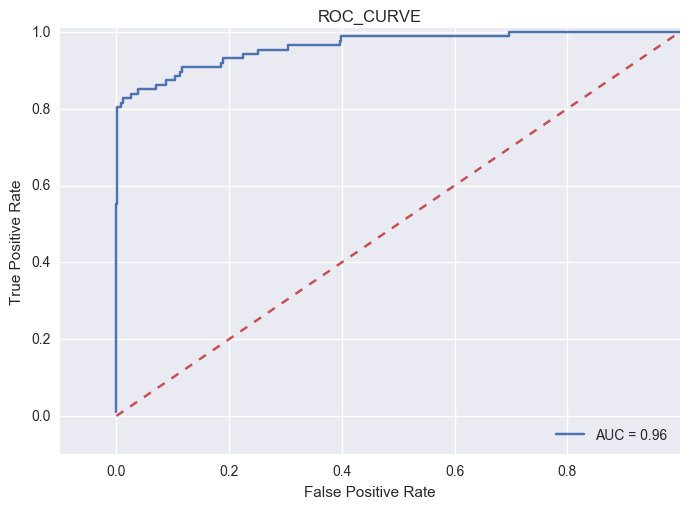

In [33]:
make_roc_curve(logreg, X_train, y_train, X_test, y_test)

<a id='1.1.1'></a>
## Under_sampling Data

Under-sampling will downsample the majority class. Some people view that the disadvantage to under-sampling is that valuable data is being discarded, and is making the independent variables look like they have a higher variance between features.

One article that argues for undersampling with a mathematical foundation is called *Class Imbalance* (by Wallace, Small, Bradley, and Trikalinos4). Their argument is that two classes must be distinguishable in the tail of some distribution of an explanatory variable. 

**Random Under Sampling**: 

Drops data from the majority class at random, usually until response is balanced.

In [34]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

rus = RandomUnderSampler(replacement=False, random_state = 1)
X_train_sample, y_train_sample = rus.fit_sample(X_train, y_train)

print('Original train set was {} and Random Under train set was {}.'.format(len(y_train), len(y_train_sample)))

Original train set was 227845 and Random Under train set was 810.


Now lets apply it to the Logistic Regression model and see its performance.

In [35]:
logistic_model(X_train_sample, y_train_sample, X_test, y_test)

Accuracy Score: 0.9716126540500685

Average Precision Score: 0.4654787462280714

Average F1 Score: 0.08695652173913043


So the results were not too good running it through logistic regression. But that was just an example to show the steps of how to resample and apply it to the model. The next step will take what we have just done another step further and include that entire step into a pipeline. The pipeline runs the two in parallel and then fits the model on the train and test. As an additional step we will later go through and see how a gridsearch is then applied to run a cross validation itteration over the model.

In [36]:
random_imb_pipe = make_pipeline(RandomUnderSampler(replacement=False, random_state=1), LogisticRegression())
scores_f1 = cross_val_score(random_imb_pipe, X_train, y_train, cv=10, scoring='f1')

print('Average Cross Validated F1 Score:',np.mean(scores_f1))

Average Cross Validated F1 Score: 0.113664347258


**Edited Nearest Neighbors**: 

Removes all instances that are misclassified nearest neighbors from the training set.

In a sense it take cares of outliers or boundary issues, because removes nearest neighbors in the classified 'all' section. That means if there are a few data points that are not being classified towards a specific class, and tend to be classified as anything. Below we will do a similar logistic regression model using this function to see the results.

In [37]:
from imblearn.under_sampling import EditedNearestNeighbours

ekk = EditedNearestNeighbours(n_neighbors=5, random_state = 1)
X_train_sample, y_train_sample = ekk.fit_sample(X_train, y_train)

print('Original Training set & Edited Nearesr Neighbors Sample set:', [len(y_train), len(y_train_sample)])

Original Training set & Edited Nearesr Neighbors Sample set: [227845, 227186]


Unlike the random sampling, this method barely shrunk the data. If you noticed the parameters that I have been using are the default parameters, which can be adjusted. Lets try the same model again with an increased n_neighbors at 10.

In [38]:
from imblearn.under_sampling import EditedNearestNeighbours

ekk = EditedNearestNeighbours(n_neighbors=10, random_state = 1)
X_train_sample, y_train_sample = ekk.fit_sample(X_train, y_train)

print('Original Training set & Edited Nearesr Neighbors Sample set:', [len(y_train), len(y_train_sample)])

Original Training set & Edited Nearesr Neighbors Sample set: [227845, 226237]


Even with ten we are still only 1000 parameters off. Lets see what the results show then adjust the parameters one more time.

In [39]:
logistic_model(X_train_sample, y_train_sample, X_test, y_test)

Accuracy Score: 0.9991397773954567

Average Precision Score: 0.6899975058992746

Average F1 Score: 0.6620689655172414


In [40]:
ekk_imb_pipe = make_pipeline(EditedNearestNeighbours(n_neighbors=15, random_state=1), LogisticRegression())
scores_f1 = cross_val_score(ekk_imb_pipe, X_train, y_train, cv=10, scoring='f1')

print('Average Cross Validated F1 Score:',np.mean(scores_f1))

Average Cross Validated F1 Score: 0.681502671806


Well the edited nearest neighbor with 15 is performing a lot better, even if the class is still very imbalanced. 

Another one similar to edited nearest neighbors is condensed nearest neighbors.

**Condensed Nearest Neighbors**:

Opposite of edited nearest neighbors it will itteratively add points to data misclassified by K-nearest neighbors. Generally will remove a lot of points from majority class. 

In [41]:
from imblearn.under_sampling import CondensedNearestNeighbour

ckk = CondensedNearestNeighbour(n_neighbors=5, random_state = 1)
X_train_sample, y_train_sample = ckk.fit_sample(X_train, y_train)

print('Original Training set & Condensed Nearest Neighbor Sample set:', [len(y_train), len(y_train_sample)])

Original Training set & Condensed Nearest Neighbor Sample set: [227845, 1383]


In [42]:
logistic_model(X_train_sample, y_train_sample, X_test, y_test)

Accuracy Score: 0.9873775499455778

Average Precision Score: 0.46657828592367934

Average F1 Score: 0.16878612716763006


In [43]:
# ckk_imb_pipe = make_pipeline(CondensedNearestNeighbour(random_state=1, n_neighbors=3), LogisticRegression())
# scores_f1 = cross_val_score(ckk_imb_pipe, X_train, y_train, cv=10, scoring='f1')

# print('Average Cross Validated F1 Score:',np.mean(scores_f1))

<a id='1.1.2'></a>
### Over_sampling Data

Over-sampling will randomly replicate minority class values to increase the sample size. Since it is replicating instances, we have to keep in mind that variables will now appear to have lower variance. However, because we are replicating instances it also means we are replicating the number of errors. So when a classifier makes a false negative error, the new sampled dataset will not make new errors for that replicated point.

**Random Over_sampling**: 

This method is similar to the way random under_sampling works, however in this case it duplicates instances in the minority class at random.

In [44]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 1)
X_train_sample, y_train_sample = ros.fit_sample(X_train, y_train)

print('Original Training set & Random Over Sample set:', [len(y_train), len(y_train_sample)])

Original Training set & Random Over Sample set: [227845, 454880]


In [45]:
logistic_model(X_train_sample, y_train_sample, X_test, y_test)

Accuracy Score: 0.9816719918542186

Average Precision Score: 0.47726997879550875

Average F1 Score: 0.1285475792988314


In [46]:
ros_pipe = make_pipeline(RandomOverSampler(random_state=1), LogisticRegression())
scores_f1 = cross_val_score(ros_pipe, X_train, y_train, cv=10, scoring='f1')

print('Average Cross Validated F1 Score:',np.mean(scores_f1))

Average Cross Validated F1 Score: 0.114753400472


**SMOTE** (Synthetic Minority Oversampling TEchnique):

This techniques creates new data points from the minority class by interpolating between existing ones. Only used for continuous data.
1. It ignores the majority class
2. Then for every minority instance it selects K-nearest neighbors
3. Then creates new data points from the first instance to each of its k-nearest neighbors

In [47]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_sm, y_sm = sm.fit_sample(X_train, y_train)

print('Resampled dataset shape {}'.format(Counter(y_sm)))
print(y_sm.shape, X_sm.shape)

Resampled dataset shape Counter({0: 227440, 1: 227440})
(454880,) (454880, 30)


In [48]:
sm_pipe = make_pipeline(SMOTE(), LogisticRegression())
scores_f1 = cross_val_score(sm_pipe, X_train, y_train, cv=10, scoring='f1')

print('Average Cross Validated F1 Score:',np.mean(scores_f1))

Average Cross Validated F1 Score: 0.189939450235


<a id='2'></a>
# Random Forest Classifier

Random Forest is an ensemble method that will do both classification and regression. Random forest takes a subsample of the data set using a technique called bootstrapping. What bootstrap does is it keeps the same length of the data but replaces on observation with a random observation from that sample. With this technique you may get multiples of the same observation, but the idea is that you are covering the entire population. From this sample it then generates a set of decisions based on a random sample of features. It decides the threshold of the feature, and makes a split. Each of the trees MSE value is averaged together to output the accuracy.

Random Forest is one of many that we will talk about that is a part of the CART (Classification and Regression Trees). The tree series stems off the basic idea of a decision tree with rules that split the data into different nodes.

I am going to take two techniques one from under sampling and one from over sampling to see how the model runs.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

### RF without undersample/oversample

As general model for comparison I want to show how well random forest performs without oversampling and undersampling.

In [ ]:
rf_params = {
    'n_estimators' : [100, 150],
    'max_depth': [5, 7],
    'min_samples_split' : [2, 3],
}

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)
rf_grid = GridSearchCV(rf, param_grid=rf_params)
rf_model = rf_grid.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

model_scores(y_test, rf_pred)

### RF with CondensedNearestNeighbour - undersampling

In [ ]:
rf_params = {
    'CondensedNearestNeighbour__n_neighbor': np.arange(3,10,1),
    'randomforestclassifier__n_estimators' : np.arange(50, 150, 10),
    'randomforestclassifier__max_depth': np.arange(5, 7, 1),
    'randomforestclassifier__min_samples_split' : [2, 3],
}

In [ ]:
ekk_pipe = make_pipeline(CondensedNearestNeighbour(n_neighbors=5, random_state=1), RandomForestClassifier(n_jobs=-1))
ekk_grid = GridSearchCV(ekk_pipe, param_grid=rf_params)
ekk_model = ekk_grid.fit(X_train, y_train)

ekk_pred = ekk_model.predict(X_test)

model_scores(y_test, ekk_pred)

### RF with SMOTE - oversampling

Please be aware that it takes a while to run. 

In [ ]:
rf_params = {
    'smote__k_neighbors': [3, 5, 7],
    'smote__out_step': [0.1, 0.5],
    'smote__kind': ['regular', 'svm'],
    'randomforestclassifier__n_estimators' : np.arange(100, 150, 10),
    'randomforestclassifier__max_depth': np.arange(5, 10, 1),
    'randomforestclassifier__min_samples_split' : [2, 3],
}

In [ ]:
sm_pipe = make_pipeline(SMOTE(random_state=1), RandomForestClassifier())
sm_grid = GridSearchCV(sm_pipe, param_grid=rf_params)
sm_model = sm_grid.fit(X_train, y_train)

sm_pred = sm_model.predict(X_test)

model_scores(y_test, sm_pred)

<a id='3'></a>
# Support Vector Classifier

Is a form of support vectore machines, which are very effective in high dimensional spaces and is memory effecient by using a subset of training points in the decision function. The classifier uses the same type of kernel function. 

If it is radial basis function then it uses an activation function to project n-dimensions of feature space. It then tries to optimize the boundaries on either side of the decision line with an expected error value. It can also include gradient descent where it attempts to fit coefficient weights by the finding the optimum local minimum. 

The linear function does not transorm the data into n-dimesions but it attempts to create a linear line through the data. If there are multiple classes then it becomes a one-verse-all method. 

**Parameters:**

**C**: is the penalty parameter, which trades off misclassification. A low C makes the decision surface smooth, white high C aims at classifying all training examples correctly. This allows the model to select more or less samples as support vectors.

**kernel**: is the type of kernel function or algorthim that would be applied to svc. For instance if it is linear there will be no activation function applied, which in other words it would not bring the feature space to n-dimension transformation. 

**gamma**: shows how far the influence of the training data point reaches. Low values mean far and high values mean close.

**step_out**: step size when extrapolating, used with kind:svm. Extrapolate means to estimate something by assuming that the current method will remain applicable for further instances outside of data scope. 

**kind**: the type of SMOTE algorithm, which would either be regular or svc. Also have 'borderline1' and 'borderline2' that would be applicable.

In [ ]:
from sklearn.svm import SVC

### SVC without undersampling/ oversampling

In [ ]:
svc_params = {
    'C': np.arange(0.1, 5, 0.5),
    'kernel': ['rbf', 'linear'],
    'gamma': np.arange(0.1, 5, 0.5),
    'max_iter':[1000]
}

In [ ]:
svc_clf = SVC()
svc_grid = GridSearchCV(svc_clf, param_grid=svc_params)
svc_model = svc_grid.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)

model_scores(y_test, svc_pred)

### SVC with CondensedNearestNeighbour - undersampling

In [ ]:
svc_params = {
    'svc__C': [0.5, 1, 1.5, 2],
    'svc__kernel': ['rbf', 'linear'],
    'svc__gamma': [1, 3, 5],
    'svc__max_iter':[1000]
}

In [ ]:
ekk_pipe2 = make_pipeline(CondensedNearestNeighbour(n_neighbors=5, random_state=1), SVC(n_jobs=-1))
ekk_grid2 = GridSearchCV(ekk_pipe2, param_grid=svc_params)
ekk_model2 = ekk_grid2.fit(X_train, y_train)

ekk_pred2 = eek_model2.predict(X_test)

model_scores(y_test, ekk_pred2)

### SVC with SMOTE - oversampling

In [ ]:
svc_params = {
    'smote__k_neighbors': [3, 5, 7],
    'smote__out_step': [0.1, 0.5],
    'smote__kind': ['regular', 'svm'],
    'svc__C': [0.5, 1, 1.5, 2],
    'svc__kernel': ['rbf', 'linear'],
    'svc__gamma': [1, 3, 5],
    'svc__max_iter':[1000]
}

In [ ]:
sm_pipe2 = make_pipeline(SMOTE(random_state=1), SVC())
sm_grid2 = GridSearchCV(sm_pipe2, param_grid=svc_params)
sm_model2 = sm_grid2.fit(X_train, y_train)

sm_pred2 = sm_model2.predict(X_test)

model_scores(y_test, sm_pred2)

<a id='4'></a>
# XGBoost

'Extreme Gradient Boosting' is another ensemble method that can handle both regression and classification. XGBoost is known for its speed and model performance. XGBoost is very similar to adaboost in the way that new models are added to the original to correct errors made by the original. What gradient boosting does is it creates new models that predict the errors of the previous model and add them together for the final prediction. It uses gradient descent algorithm to minimize the loss when adding the new models. 

Gradient Descent is an itterative optimization algorithm that uses learning rate to find the optimal local minimum.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg_params = {
    'colsample_bytree': [0.2],
    'gamma':[0.01],
    'learning_rate':[0.001, 0.01],
    'max_depth':np.arange(3,7,1),
    'n_estimators':[4000, 5000],                                                                  
    'reg_alpha':[0.5,0.9],
    'reg_lambda':[0.3, 0.4, 0.5],
    'subsample': [0.2]
}

In [ ]:
xgb_clf = XGBClassifier()
xgb_grid = GridSearchCV(xgb_clf, param_grid=xg_params)
xgb_model = xgb_grid.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

model_scores(y_test, xgb_pred)

### XGBoost with CondensedNearestNeighbour - undersampling

In [ ]:
xg_params = {
    'xgbclassifier__colsample_bytree': [0.2],
    'xgbclassifier__gamma':[0.01],
    'xgbclassifier__learning_rate':[0.001, 0.01],
    'xgbclassifier__max_depth':np.arange(3,7,1),
    'xgbclassifier__n_estimators':[4000, 5000],                                                                  
    'xgbclassifier__reg_alpha':[0.5,0.9],
    'xgbclassifier__reg_lambda':[0.3, 0.4, 0.5],
    'xgbclassifier__subsample': [0.2]
}

In [ ]:
ekk_pipe = make_pipeline(CondensedNearestNeighbour(n_neighbors=5, random_state=1), XGBClassifier())
ekk_grid = GridSearchCV(ekk_pipe, param_grid=xg_params)
ekk_model = ekk_grid.fit(X_train, y_train)

ekk_pred = eek_model.predict(X_test)

model_scores(y_test, ekk_pred3)

### XGBoost with  SMOTE- oversampling

In [ ]:
xg_params = {
    'smote__k_neighbors': [3, 5, 7],
    'smote__out_step': [0.1, 0.5],
    'smote__kind': ['regular', 'svm'],
    'xgbclassifier__colsample_bytree': [0.2],
    'xgbclassifier__gamma':[0.01],
    'xgbclassifier__learning_rate':[0.001, 0.01],
    'xgbclassifier__max_depth':np.arange(3,7,1),
    'xgbclassifier__n_estimators':[4000, 5000],                                                                  
    'xgbclassifier__reg_alpha':[0.5,0.9],
    'xgbclassifier__reg_lambda':[0.3, 0.4, 0.5],
    'xgbclassifier__subsample': [0.2]
}

In [ ]:
sm_pipe3 = make_pipeline(SMOTE(random_state=1), XGBClassifier())
sm_grid3 = GridSearchCV(sm_pipe3, param_grid=xg_params)
sm_model3 = sm_grid3.fit(X_train, y_train)

sm_pred3 = sm_model3.predict(X_test)

model_scores(y_test, sm_pred3)

# Summary

In the end I found that there is a lot that can be done with imbalanced data in order to get equivalent sample sizes to please the model. I always find it interesting to look at the data from the beginning, and try to see if we can detect any patterns prior to the modeling. 

If time were on my side one or two of the additional things is that I would have got feature importance for each of the models. I also would have used that to look back at the model and try to piece how some of the things work together for better explanatory power. 